# Cải thiện hình ảnh qua xử lý điểm (Image Enhacement Point Processing)

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

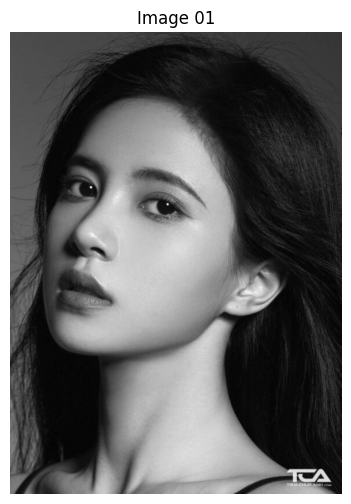

In [12]:
# Đường dẫn đến file ảnh
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image01.jpg'

# Kiểm tra xem file có tồn tại hay không
if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy file tại đường dẫn {image_path}")
else:
    # Đọc ảnh gốc ở dạng grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Kiểm tra xem ảnh có được đọc thành công hay không
    if image is None:
        print("Lỗi: Không thể đọc được ảnh. Vui lòng kiểm tra file.")
    else:
        # Chuyển ảnh sang RGB để hiển thị với matplotlib
        image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

        # Hiển thị ảnh
        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.title('Image 01')
        plt.axis('off')
        plt.show()

## Negative images

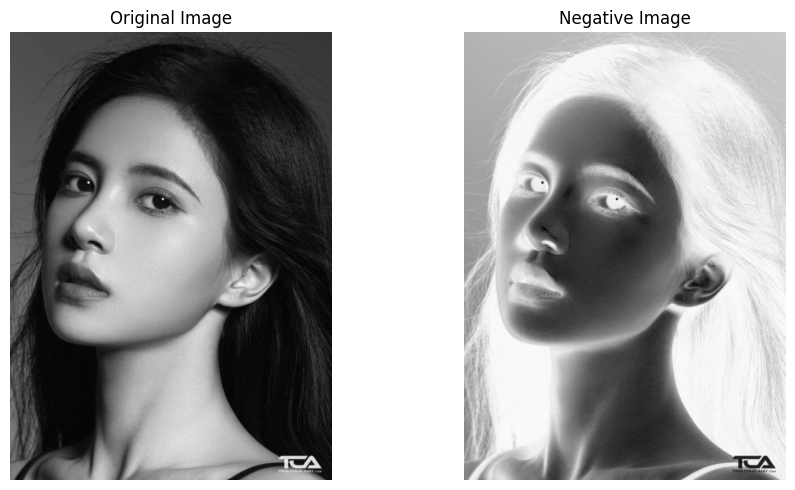

In [13]:
# Hàm tạo ảnh âm bản
def negative_image(image):
    return 255 - image  # Lấy giá trị âm bản bằng cách trừ từ 255

# Áp dụng thuật toán Negative Image
negative = negative_image(image)

# Hiển thị ảnh gốc và ảnh âm bản
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ảnh âm bản
plt.subplot(1, 2, 2)
plt.imshow(negative, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Point processing: Threshold

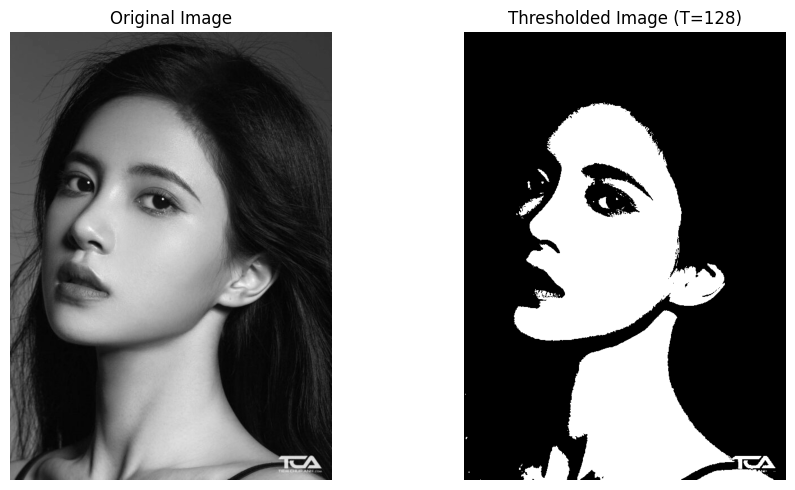

In [14]:
# Hàm thực hiện Thresholding
def threshold_image(image, T=128):
    # So sánh giá trị pixel với ngưỡng T
    thresholded = np.where(image >= T, 255, 0).astype(np.uint8)
    return thresholded

# Áp dụng thuật toán Threshold với ngưỡng T=128
thresholded_image = threshold_image(image, T=128)

# Hiển thị ảnh gốc và ảnh sau khi áp dụng Thresholding
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ảnh sau Thresholding
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()

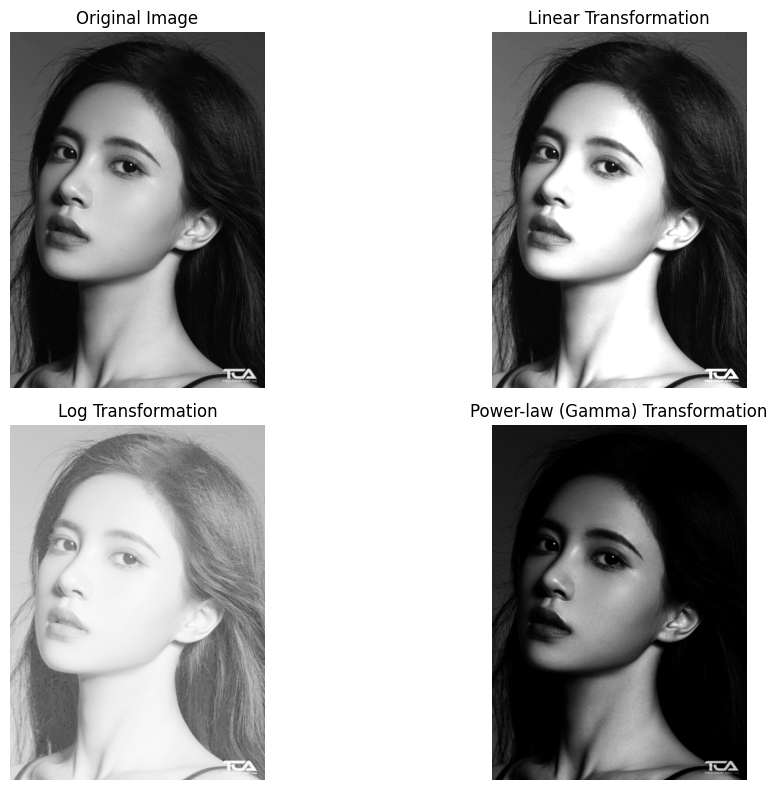

In [19]:
# 1. Linear Transformation
def linear_transformation(image, a=1.2, b=20):
    return np.clip(a * image + b, 0, 255).astype(np.uint8)

linear_image = linear_transformation(image, a=1.2, b=20)

# 2. Log Transformation
def log_transformation(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image)
    return np.clip(log_image, 0, 255).astype(np.uint8)

log_image = log_transformation(image)

# 3. Power-law (Gamma) Transformation
def gamma_correction(image, gamma=2.0):
    c = 255 / (np.max(image) ** gamma)
    gamma_image = c * (image ** gamma)
    return np.clip(gamma_image, 0, 255).astype(np.uint8)

gamma_image = gamma_correction(image, gamma=2.0)

# Hiển thị ảnh gốc và các phép biến đổi
plt.figure(figsize=(12, 8))

# Ảnh gốc
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Linear Transformation
plt.subplot(2, 2, 2)
plt.imshow(linear_image, cmap='gray')
plt.title('Linear Transformation')
plt.axis('off')

# Log Transformation
plt.subplot(2, 2, 3)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gamma_image, cmap='gray')
plt.title('Power-law (Gamma) Transformation')
plt.axis('off')

plt.tight_layout()
plt.show()

## More Contrast Issues

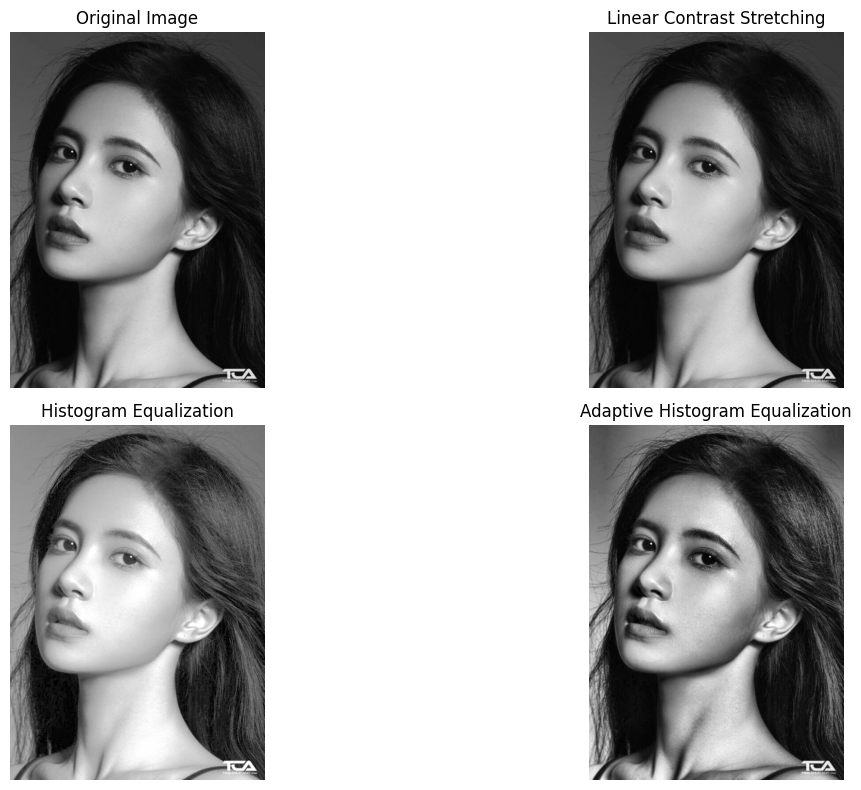

In [20]:
# 1. Linear Contrast Stretching
def contrast_stretching(image):
    I_min, I_max = np.min(image), np.max(image)
    stretched = ((image - I_min) / (I_max - I_min) * 255).astype(np.uint8)
    return stretched

stretched_image = contrast_stretching(image)

# 2. Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# 3. Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_equalized_image = clahe.apply(image)

# Hiển thị kết quả
plt.figure(figsize=(15, 8))

# Hình ảnh gốc
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Linear Contrast Stretching
plt.subplot(2, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Linear Contrast Stretching')
plt.axis('off')

# Histogram Equalization
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

# Adaptive Histogram Equalization (CLAHE)
plt.subplot(2, 2, 4)
plt.imshow(adaptive_equalized_image, cmap='gray')
plt.title('Adaptive Histogram Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()

## Piecewise Linear Transformation Functions

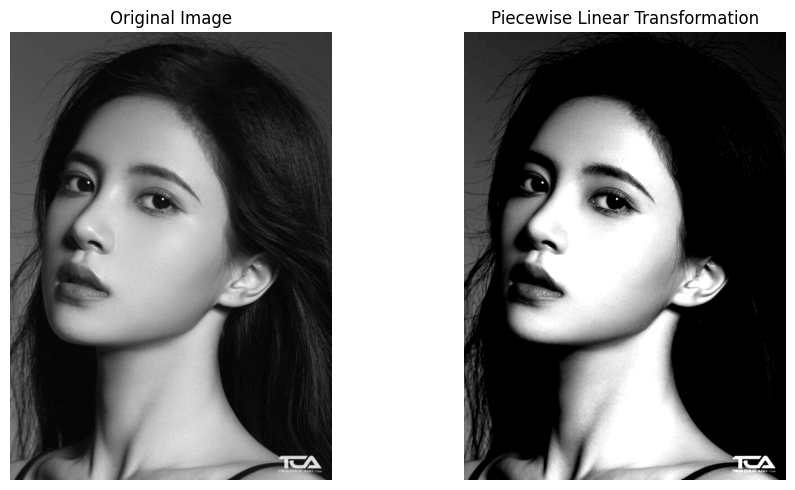

In [21]:
# Hàm Piecewise Linear Transformation
def piecewise_linear_transform(image, r1=50, s1=0, r2=200, s2=255):
    """
    r1, s1: Điểm đầu tiên của đoạn tuyến tính (input, output)
    r2, s2: Điểm thứ hai của đoạn tuyến tính (input, output)
    """
    # Tạo bản đồ chuyển đổi tuyến tính
    lut = np.zeros(256, dtype=np.uint8)
    for r in range(256):
        if r < r1:
            lut[r] = int(s1 / r1 * r)
        elif r1 <= r <= r2:
            lut[r] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
        else:
            lut[r] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)
    # Áp dụng LUT vào ảnh
    transformed_image = cv2.LUT(image, lut)
    return transformed_image

# Áp dụng Piecewise Linear Transformation
transformed_image = piecewise_linear_transform(image, r1=50, s1=0, r2=200, s2=255)

# Hiển thị ảnh gốc và ảnh sau biến đổi
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ảnh sau biến đổi
plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Piecewise Linear Transformation')
plt.axis('off')

plt.tight_layout()
plt.show()

## Bit Plane Slicing

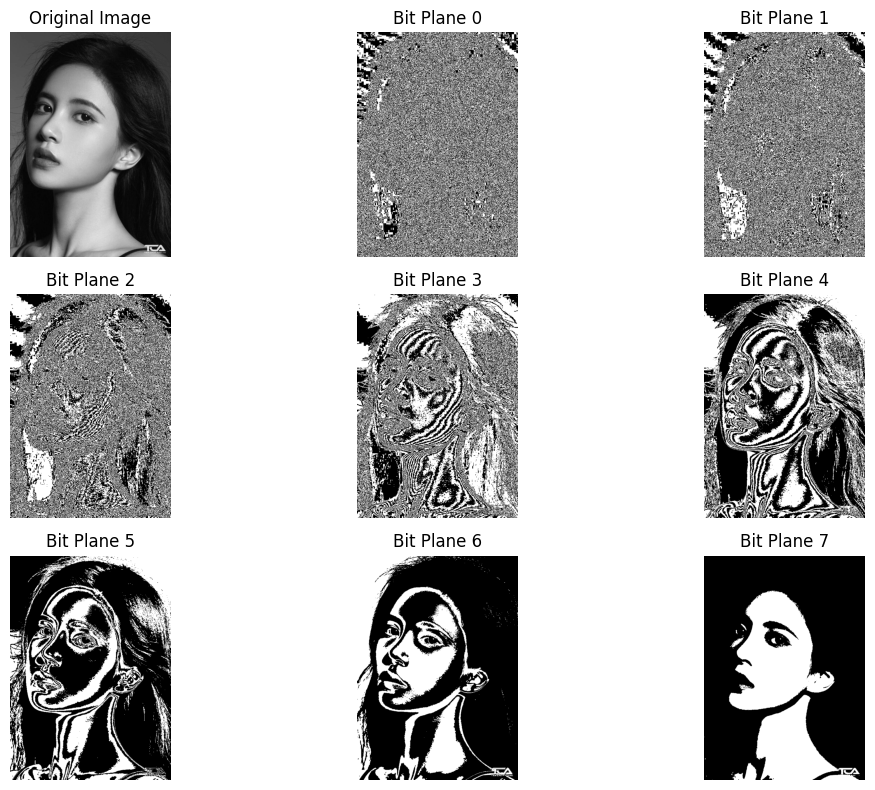

In [22]:
# Hàm Bit Plane Slicing
def bit_plane_slicing(image, bit_position):
    """
    Trích xuất mặt phẳng bit cụ thể.
    bit_position: vị trí bit (0 đến 7).
    """
    # Dịch phải bit_position và lấy bit cuối cùng
    bit_plane = (image >> bit_position) & 1
    # Chuyển đổi thành giá trị mức xám để dễ quan sát (0 hoặc 255)
    bit_plane_visual = bit_plane * 255
    return bit_plane_visual

# Tạo các mặt phẳng bit từ 0 đến 7
bit_planes = [bit_plane_slicing(image, i) for i in range(8)]

# Hiển thị ảnh gốc và các mặt phẳng bit
plt.figure(figsize=(12, 8))

# Ảnh gốc
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Hiển thị các mặt phẳng bit
for i in range(8):
    plt.subplot(3, 3, i + 2)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()